In [3]:
from Scripts import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [4]:
importlib.reload(NN)

<module 'Scripts.NN' from '/home/bouissob/Code/Scripts/NN.py'>

In [5]:
#def __init__(self, Epoch = 2, Neur_seq = '32_64_64_32', Dataset_train = ['Ocean1'], 
#             Oc_mod_type = 'COM_NEMO-CNRS', Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], 
#             Var_Y = 'meltRate', activ_fct = 'swish', Norm_Choix = 0, verbose = 1, batch_size = 32, Extra_n = '')

In [6]:
#Test = NN.model_NN(Epoch = 1, Neur_seq = '4_2')
#Test.train()

In [7]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']

In [8]:
importlib.reload(NN)
Training = NN.Sequencial_training(NN.model_NN)
len(Training.Neur_seq_preview(5))

#class Sequencial_training():
#    def training(self, training_extent = 1, verbose = 1, Verify = 1,
#                 Standard_train = ['32_64_64_32'], **kwargs):

46

In [ ]:
Training.training(training_extent = 0, verbose = 1, batch_size = 64, Exact = 1, message = 1,Standard_train = ['64_64_64_96_96'],
                Dataset_train = OcT, Epoch = 16, Var_X = Var_X2, Verify = 0, Extra_n = 'Same_ind', Similar_training = 0)

Projected training regiment :
 ['64_64_64_96_96']
Starting training for neurone : 64_64_64_96_96, 0/1 (Previous step : 0.000 s)


In [17]:
importlib.reload(NN)
#NN.Plot_loss_model(ind = 1, Epoch = 6)

<module 'NN' from '/home/bouissob/Code/NN.py'>

In [87]:
NN.Get_model_path_json(Var = Var_X2, Ocean = 'Ocean2', Exact = 1, Epoch = 7)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean2/Ep_7_N_32_64_64_32_Ch_0-1646232083_Ex_']


['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean2/Ep_7_N_32_64_64_32_Ch_0-1646232083_Ex_']

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_']
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Data variables used : x y temperatureYZ salinityYZ iceDraft
[1.08062184]0 / 1200


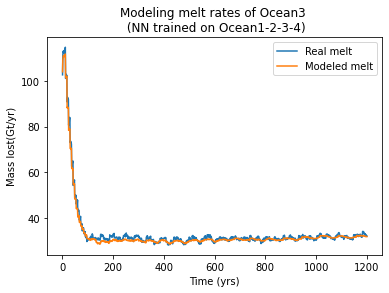

In [81]:
NN.Plot_Melt_time_function(ind = 0,save = True, Epoch = 5, message = 1, 
                    Exact = 1, Ocean_trained = OcT, Ocean_target = 'Ocean3', Extra_n = [])

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_']
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Data variables used : x y temperatureYZ salinityYZ iceDraft
[0.12382607]0 / 1200


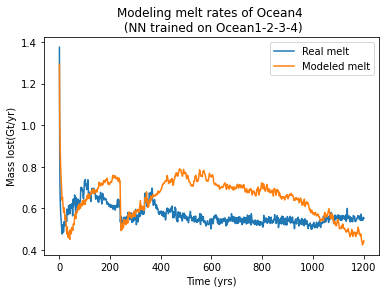

In [82]:
NN.Plot_Melt_time_function(ind = 0,save = True, Epoch = 5, message = 1, Exact = 1, 
                           Ocean_trained = OcT, Ocean_target = 'Ocean4', Extra_n = [])

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_6_N_64_64_64_64_Ch_0-1646005997
Data variables used : x y temperatureYZ salinityYZ iceDraft


(array([-2.22262884e-08,  1.10324840e-09]),
 array([1.69461089e-07, 4.18992240e-08]))

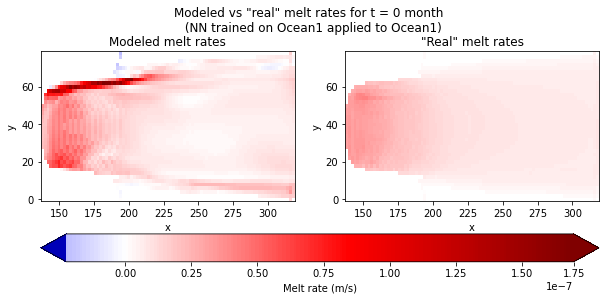

In [84]:
importlib.reload(NN)
NN.Plotting_side_by_side(ind = 23,save = False, Epoch = 6, T = 0, Ocean_target = 'Ocean1', 
            Extra_n = [], Ocean_trained = 'Ocean1', Exact = 1)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_5_N_32_64_64_32_Ch_0-1646492013_Ex_
Data variables used : temperatureYZ salinityYZ iceDraft


(array([-6.29552233e-09,  1.10324840e-09]),
 array([6.85626844e-08, 4.18992240e-08]))

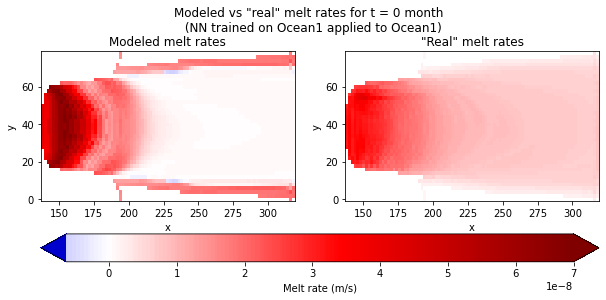

In [86]:
NN.Plotting_side_by_side(ind = 0,save = False ,
                        Epoch = 5, T = 0, Ocean_target = 'Ocean1')

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_12
Starting 1/24 model Ep_12_N_1_Ch_0-1646054833_Ex_
Starting 2/24 model Ep_12_N_4_Ch_0-1646054967_Ex_
Starting 3/24 model Ep_12_N_8_Ch_0-1646055101_Ex_
Starting 4/24 model Ep_12_N_16_Ch_0-1646055235_Ex_
Starting 5/24 model Ep_12_N_4_16_Ch_0-1646055371_Ex_
Starting 6/24 model Ep_12_N_8_16_Ch_0-1646055514_Ex_
Starting 7/24 model Ep_12_N_16_16_Ch_0-1646055657_Ex_
Starting 8/24 model Ep_12_N_4_32_Ch_0-1646055801_Ex_
Starting 9/24 model Ep_12_N_8_32_Ch_0-1646055943_Ex_
Starting 10/24 model Ep_12_N_16_32_Ch_0-1646056086_Ex_
Starting 11/24 model Ep_12_N_4_64_Ch_0-1646056234_Ex_
Starting 12/24 model Ep_12_N_8_64_Ch_0-1646056381_Ex_
Starting 13/24 model Ep_12_N_16_64_Ch_0-1646056529_Ex_
Starting 14/24 model Ep_12_N_8_32_64_Ch_0-1646056717_Ex_
Starting 15/24 model Ep_12_N_16_32_64_Ch_0-1646056926_Ex_
Starting 16/24 model Ep_12_N_32_32_64_Ch_0-1646057101_Ex_
Starting 17/24 model Ep_12_N_8_64_64_Ch_0-1646057308_Ex_
Starting 18/24 model Ep_12_

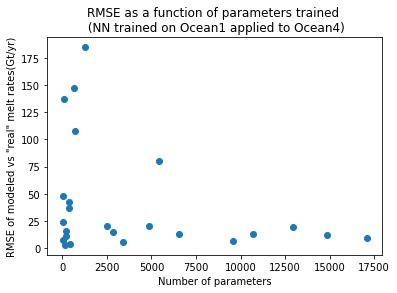

In [11]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 8, Ocean_trained = 'Ocean1', message = 0, Ocean_target = 'Ocean4')

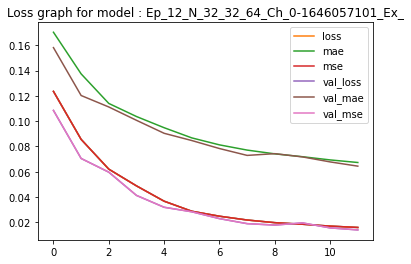

In [98]:
NN.Plot_loss_model(ind = 15, Epoch = 12, Ocean = 'Ocean1', Exact = 1) 

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_3
Starting 1/51 model Ep_6_N_1_Ch_0-1646003136
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 2/51 model Ep_4_N_32_64_64_32_Ch_0-1645997060
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 3/51 model Ep_6_N_4_Ch_0-1646003252
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 4/51 model Ep_6_N_8_Ch_0-1646003370
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 5/51 model Ep_6_N_16_Ch_0-1646003488
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 6/51 model Ep_6_N_4_16_Ch_0-1646003607
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 7/51 model Ep_6_N_8_16_Ch_0-1646003735
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 8/51 model Ep_6_N_16_16_Ch_0-1646003862
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 9/51 model Ep_6_N_4_32_Ch_0-1646003992
Data variables used : x y temperat

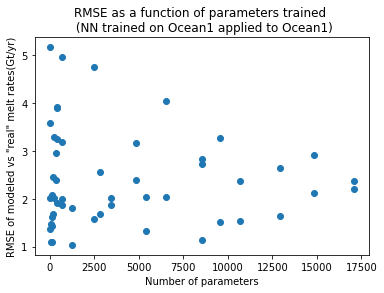

In [16]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = False, Epoch = 3, Ocean_trained = 'Ocean1', message = 1)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_12
Starting 1/24 model Ep_12_N_1_Ch_0-1646054833_Ex_
Starting 2/24 model Ep_12_N_4_Ch_0-1646054967_Ex_
Starting 3/24 model Ep_12_N_8_Ch_0-1646055101_Ex_
Starting 4/24 model Ep_12_N_16_Ch_0-1646055235_Ex_
Starting 5/24 model Ep_12_N_4_16_Ch_0-1646055371_Ex_
Starting 6/24 model Ep_12_N_8_16_Ch_0-1646055514_Ex_
Starting 7/24 model Ep_12_N_16_16_Ch_0-1646055657_Ex_
Starting 8/24 model Ep_12_N_4_32_Ch_0-1646055801_Ex_
Starting 9/24 model Ep_12_N_8_32_Ch_0-1646055943_Ex_
Starting 10/24 model Ep_12_N_16_32_Ch_0-1646056086_Ex_
Starting 11/24 model Ep_12_N_4_64_Ch_0-1646056234_Ex_
Starting 12/24 model Ep_12_N_8_64_Ch_0-1646056381_Ex_
Starting 13/24 model Ep_12_N_16_64_Ch_0-1646056529_Ex_
Starting 14/24 model Ep_12_N_8_32_64_Ch_0-1646056717_Ex_
Starting 15/24 model Ep_12_N_16_32_64_Ch_0-1646056926_Ex_
Starting 16/24 model Ep_12_N_32_32_64_Ch_0-1646057101_Ex_
Starting 17/24 model Ep_12_N_8_64_64_Ch_0-1646057308_Ex_
Starting 18/24 model Ep_12_

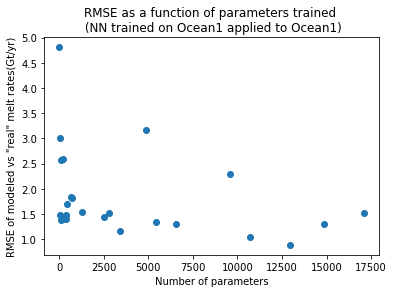

In [52]:
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = True, Epoch = 12, Ocean_trained = 'Ocean1', message = 0)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_4
Starting 1/53 model Ep_6_N_1_Ch_0-1646003136
Starting 2/53 model Ep_4_N_32_64_64_32_Ch_0-1645997060
Starting 3/53 model Ep_6_N_4_Ch_0-1646003252
Starting 4/53 model Ep_6_N_8_Ch_0-1646003370
Starting 5/53 model Ep_6_N_16_Ch_0-1646003488
Starting 6/53 model Ep_6_N_4_16_Ch_0-1646003607
Starting 7/53 model Ep_6_N_8_16_Ch_0-1646003735
Starting 8/53 model Ep_6_N_16_16_Ch_0-1646003862
Starting 9/53 model Ep_6_N_4_32_Ch_0-1646003992
Starting 10/53 model Ep_6_N_8_32_Ch_0-1646004120
Starting 11/53 model Ep_6_N_16_32_Ch_0-1646004251
Starting 12/53 model Ep_6_N_4_64_Ch_0-1646004380
Starting 13/53 model Ep_6_N_8_64_Ch_0-1646004510
Starting 14/53 model Ep_6_N_16_64_Ch_0-1646004638
Starting 15/53 model Ep_6_N_8_32_64_Ch_0-1646004769
Starting 16/53 model Ep_6_N_16_32_64_Ch_0-1646004917
Starting 17/53 model Ep_6_N_32_32_64_Ch_0-1646005063
Starting 18/53 model Ep_6_N_8_64_64_Ch_0-1646005213
Starting 19/53 model Ep_6_N_16_64_64_Ch_0-1646005365
Star

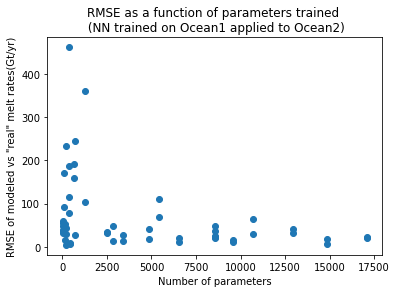

In [38]:
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = True, Epoch = 4, 
                        Ocean_trained = 'Ocean1', message = 0, Exact = 0, Ocean_target = 'Ocean2')

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_


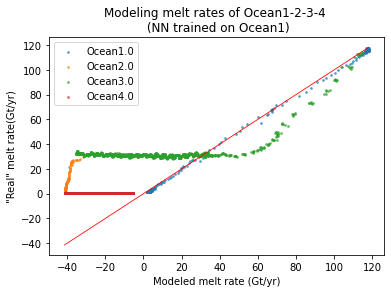

In [12]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 5, 
            Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, Exact = 1, Extra_n = [])

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_


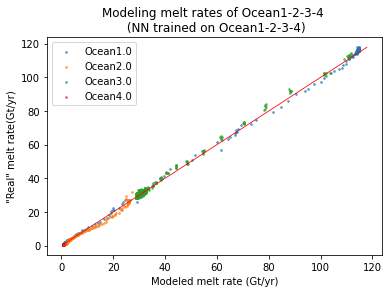

In [13]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 5, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, Exact = 1, Extra_n = [])

In [7]:
#Epoch, Neur, Choix = re.findall('Ep_(\d+)_N_(\w+)_Ch_(\d+)', Test)[0]

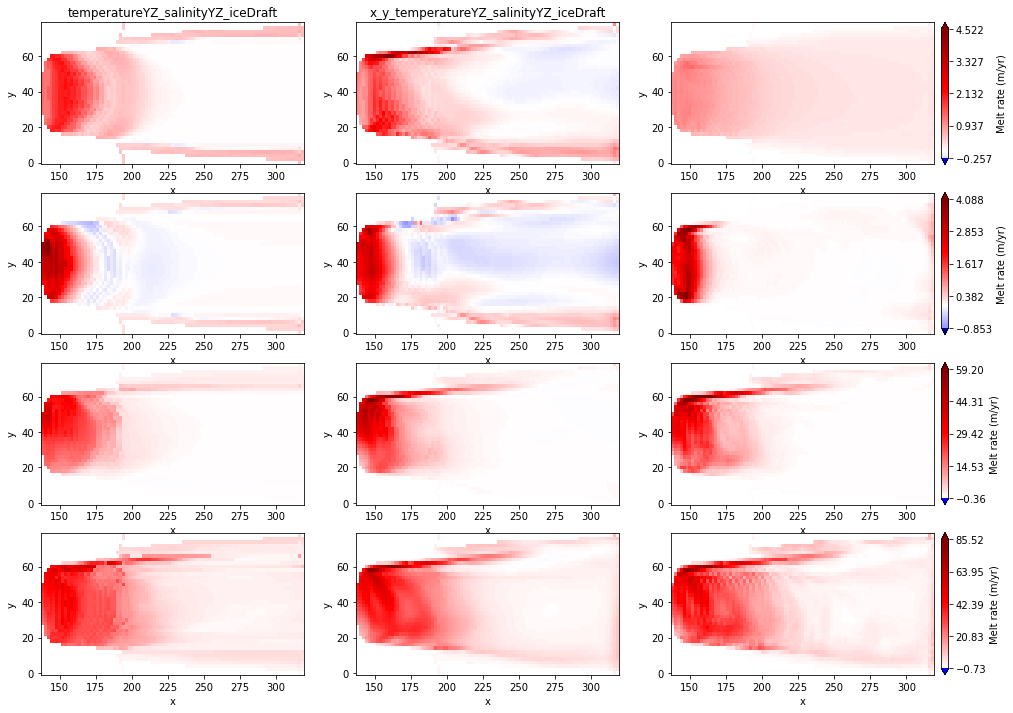

In [14]:
importlib.reload(NN)
Mods = [{'Epoch' : 5, 'Var' : Var_X_non_position, 'Exact':1, 'Neur' : '32_64_64_32'}
       ,{'Epoch' : 5, 'Var' : Var_X2, 'Exact':0, 'Neur' : '32_64_64_32'}]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

A = NN.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1')

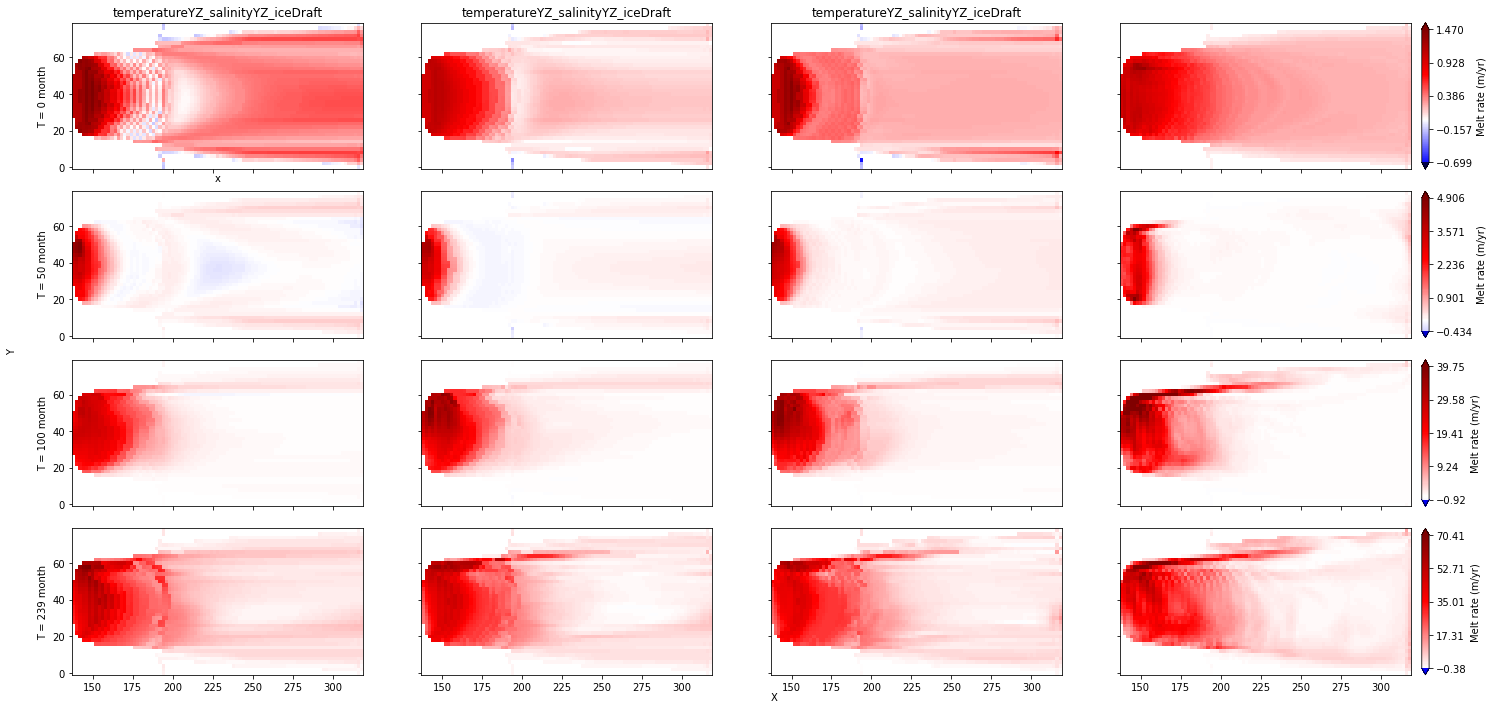

In [13]:
#importlib.reload(NN)
#A = NN.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 239])
importlib.reload(NN)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '16_16', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '32_32_32', 'Ocean' : OcT},
       {'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96_96', 'Ocean' : '_'.join(OcT)},
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

A = NN.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = True)

In [14]:
importlib.reload(NN)
NN.Plot_total_RMSE_param(Ocean_target = OcT, Epoch = 8, Ocean_trained = OcT, message = 0, Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Extra_n' : 'Same_ind'})

KeyboardInterrupt: 

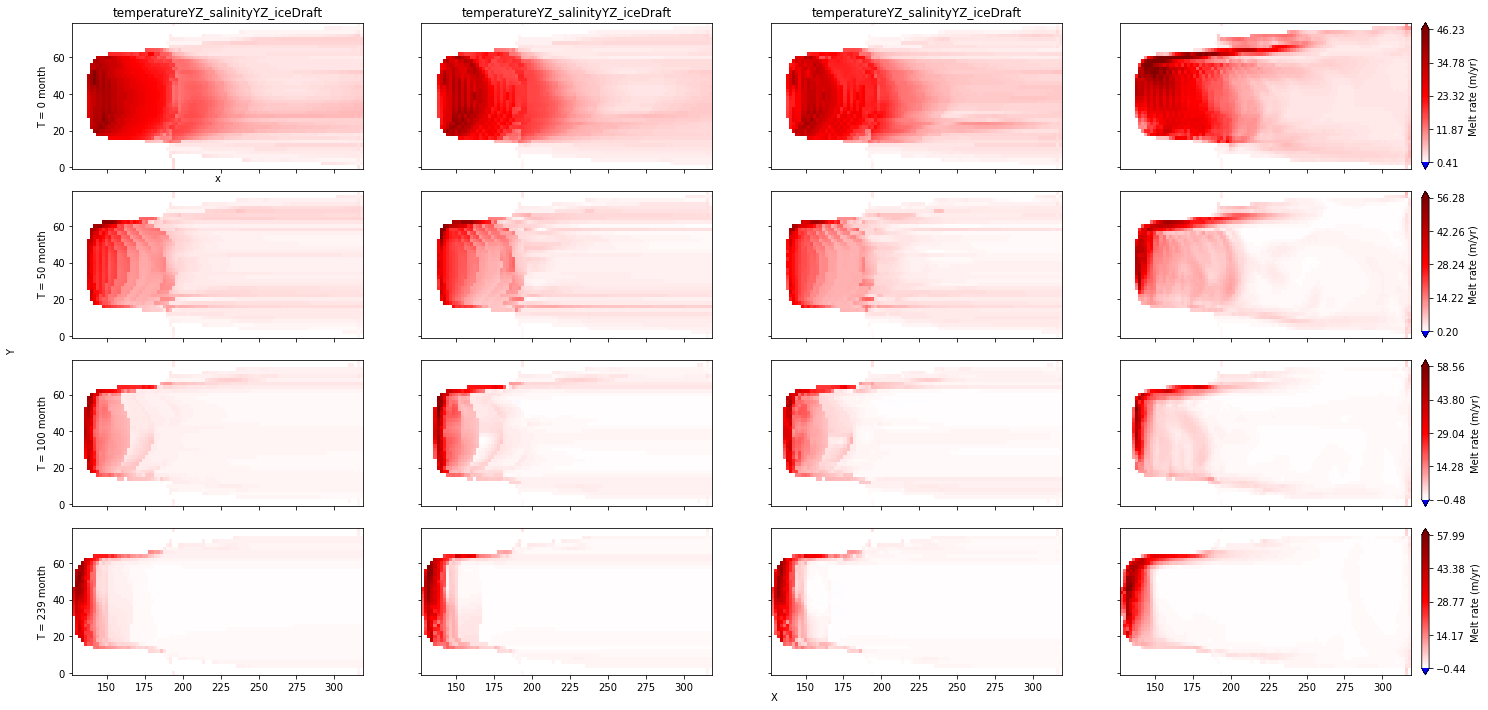

In [15]:
A = NN.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean3', save = True)

In [5]:
li = ['Temp', 'iceD', 'Salin']

In [6]:
[B[i] for i in li]

[1, 3, 2]

In [8]:
A = [12, 234, 234, 12, 23, 34, 23, 23]